In [19]:
import sys
import os
sys.path.append(os.path.abspath('../src/scripts'))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import vice
from multizone_stars import MultizoneStars
from utils import get_bin_centers
import paths

In [16]:
plt.style.use(paths.styles / 'presentation.mplstyle')

## Inside-Out SFH

In [3]:
output_name = '/'.join(['gaussian', 'insideout', 'powerlaw_slope11', 'diskmodel'])
insideout_mzs = MultizoneStars.from_output(output_name)
insideout_mzs.model_uncertainty(inplace=True)

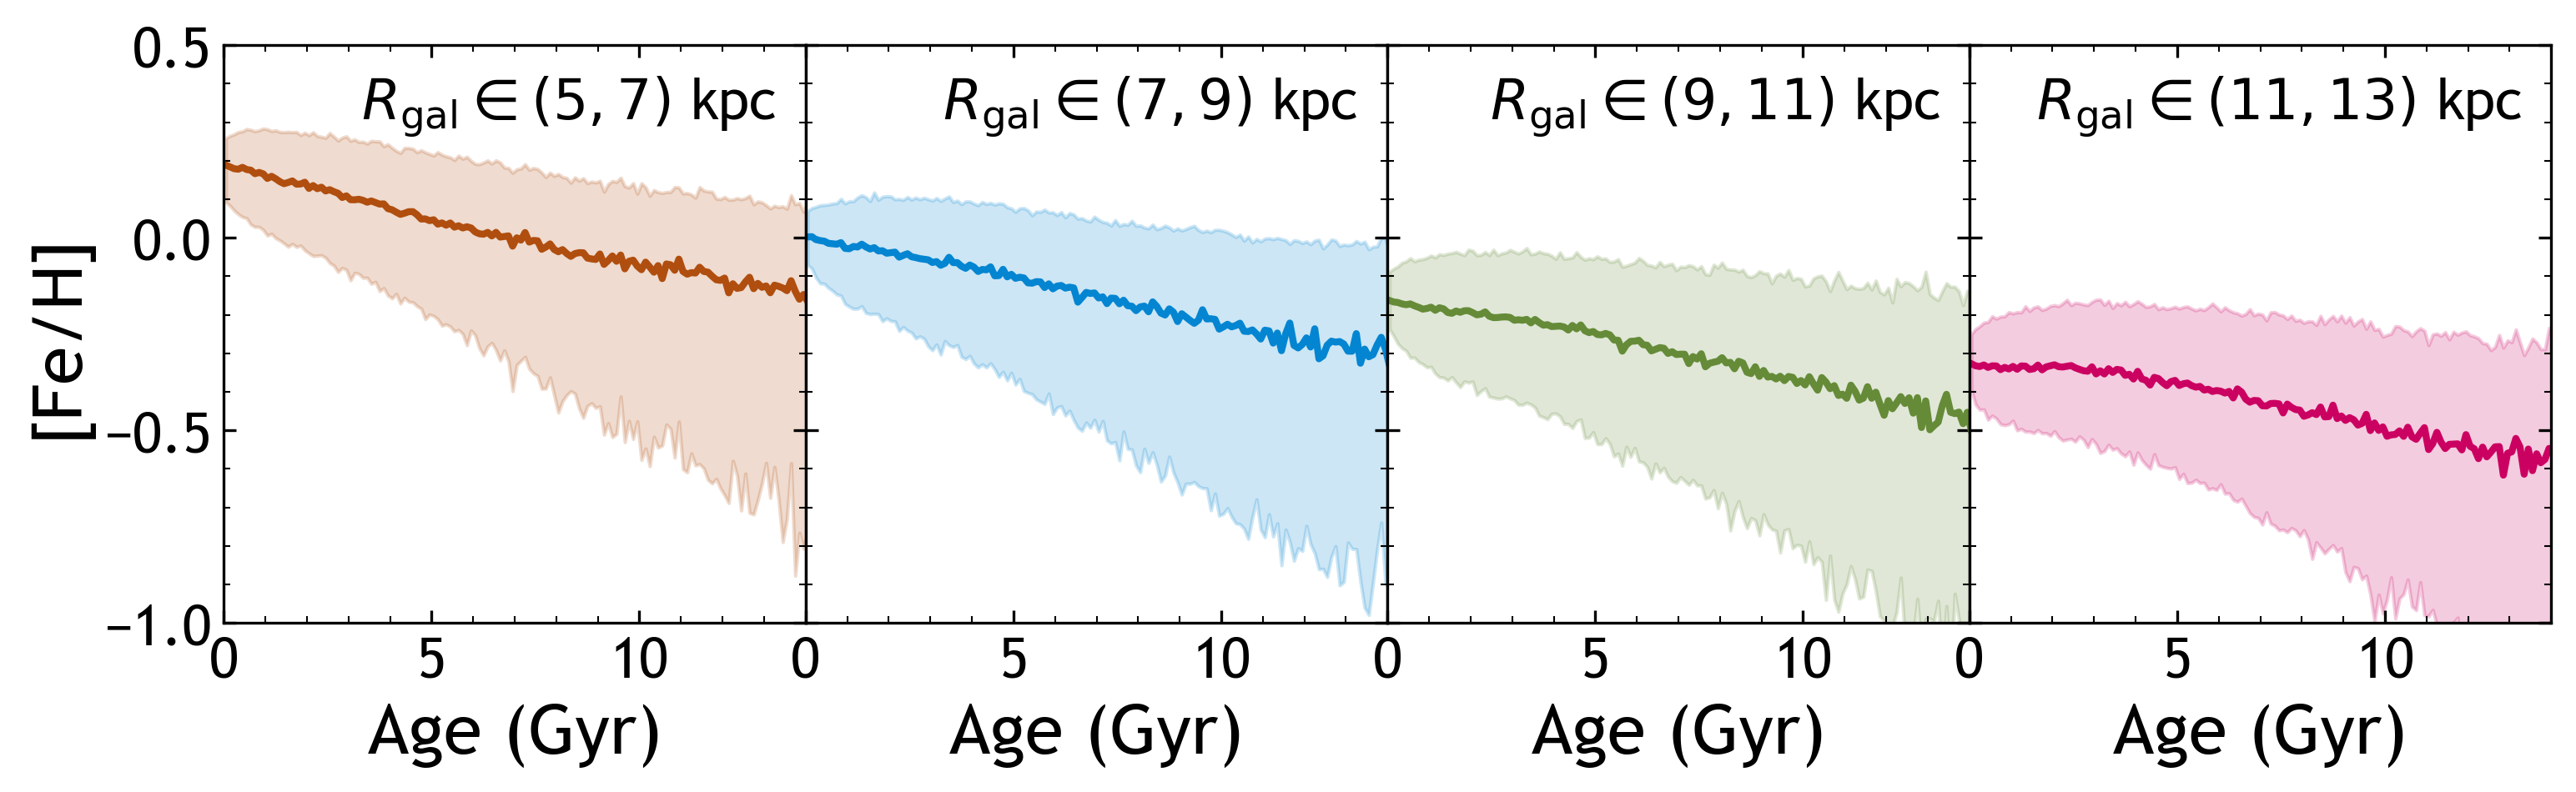

In [42]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True, gridspec_kw={'wspace': 0})
rgal_bins = [(5, 7), (7, 9), (9, 11), (11, 13)]
age_bins = np.arange(0, 16.1, 0.1)
colors = ['xkcd:burnt sienna','xkcd:cerulean','xkcd:moss green','xkcd:deep pink']
for i, rgal_lim in enumerate(rgal_bins):
    vice_subset = insideout_mzs.region(rgal_lim, (0, 2))
    subset_stars = vice_subset.stars
    binned_age = subset_stars.groupby(pd.cut(subset_stars['age'], age_bins), observed=False)
    # Medians
    feh_medians = binned_age['[fe/h]'].median()
    axs[i].plot(get_bin_centers(age_bins), feh_medians, color=colors[i])
    # 1-sigma region
    feh_high = binned_age['[fe/h]'].quantile(0.84)
    feh_low = binned_age['[fe/h]'].quantile(0.16)
    axs[i].fill_between(get_bin_centers(age_bins), feh_low, feh_high, color=colors[i], alpha=0.2)
    axs[i].text(0.95, 0.95, r'$R_{\rm gal}\in (%s, %s)$ kpc' % rgal_lim, 
                transform=axs[i].transAxes, ha='right', va='top')
    axs[i].set_xlabel('Age (Gyr)')
axs[0].set_ylabel('[Fe/H]')
axs[0].set_ylim((-1, 0.5))
axs[0].set_xlim((0, 14))
axs[0].xaxis.set_major_locator(MultipleLocator(5))
axs[0].xaxis.set_minor_locator(MultipleLocator(1))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.1))
plt.show()

## Late-burst SFH

In [28]:
output_name = '/'.join(['gaussian', 'lateburst', 'powerlaw_slope11', 'diskmodel'])
lateburst_mzs = MultizoneStars.from_output(output_name)
lateburst_mzs.model_uncertainty(inplace=True)

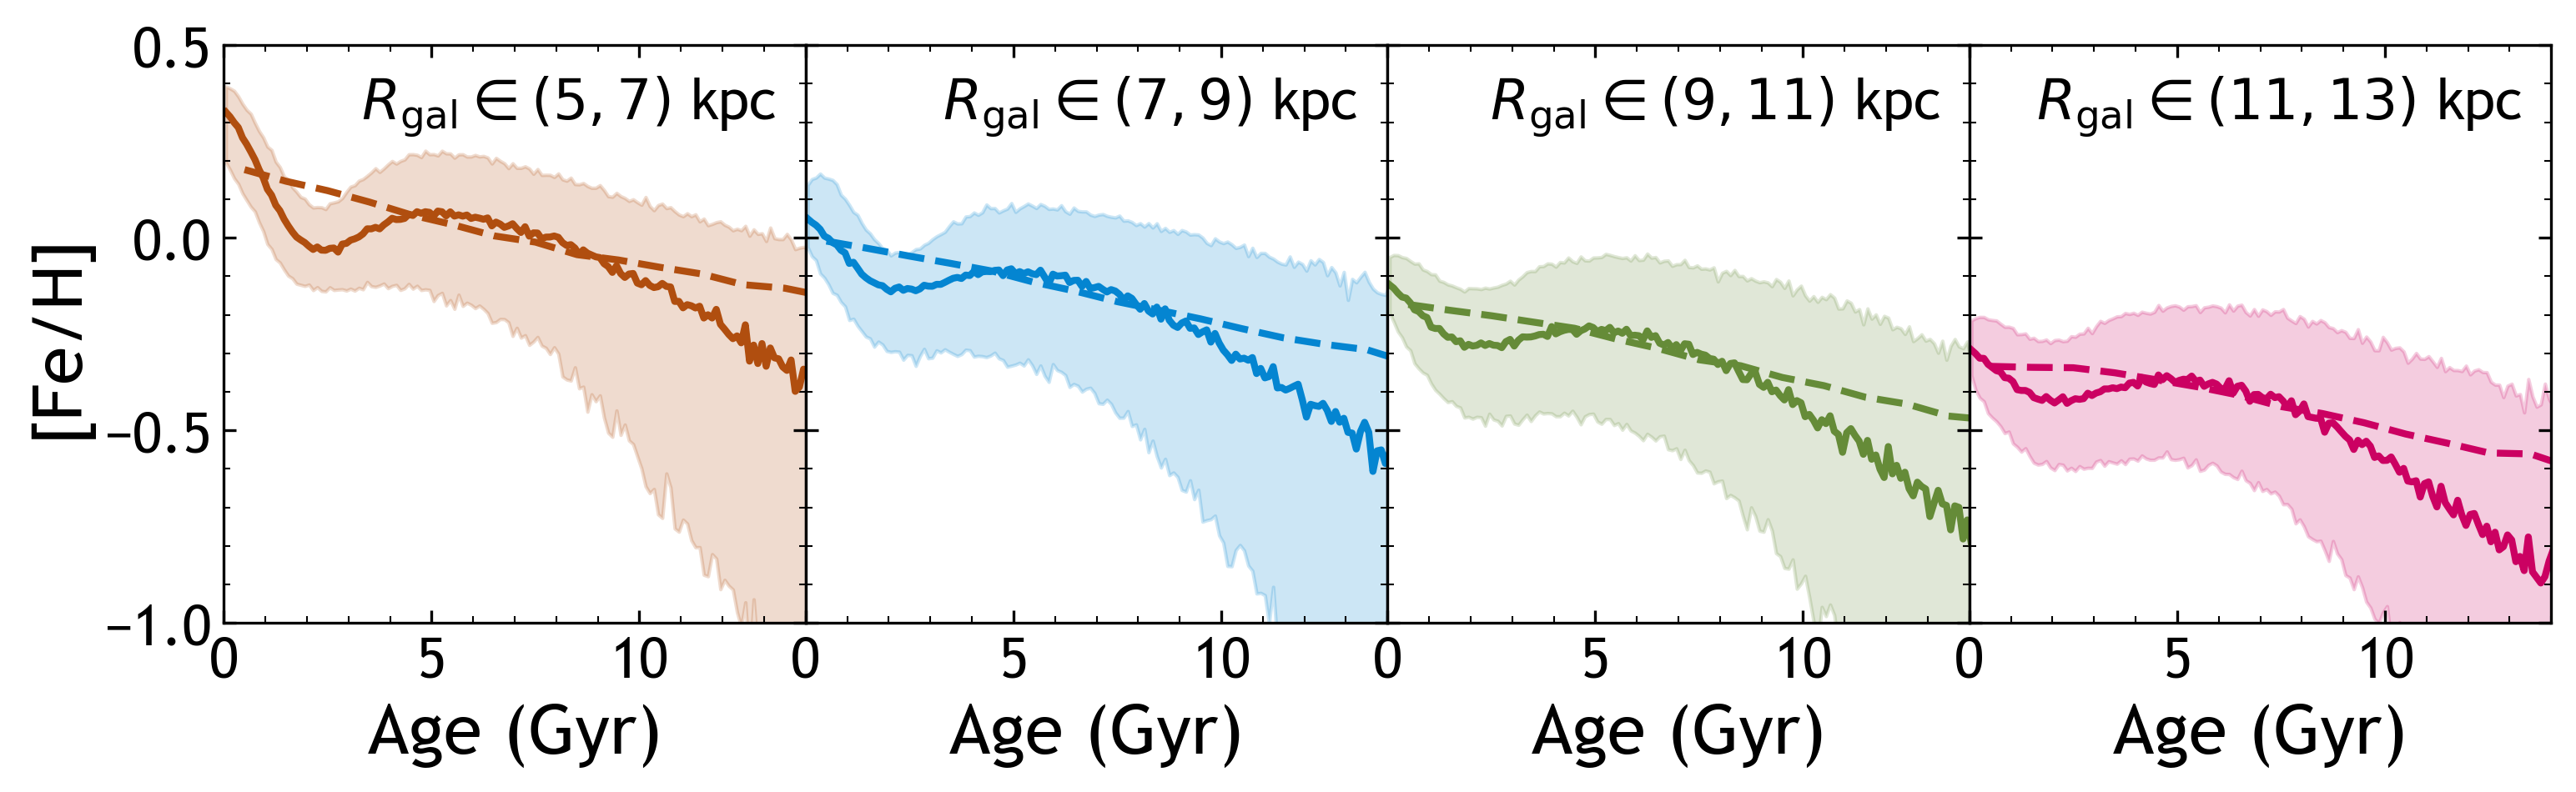

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True, gridspec_kw={'wspace': 0})
rgal_bins = [(5, 7), (7, 9), (9, 11), (11, 13)]
age_bins = np.arange(0, 16.1, 0.1)
sparse_age_bins = np.arange(0, 17, 1)
colors = ['xkcd:burnt sienna','xkcd:cerulean','xkcd:moss green','xkcd:deep pink']
for i, rgal_lim in enumerate(rgal_bins):
    vice_subset = lateburst_mzs.region(rgal_lim, (0, 2))
    subset_stars = vice_subset.stars
    binned_age = subset_stars.groupby(pd.cut(subset_stars['age'], age_bins), observed=False)
    # Medians
    feh_medians = binned_age['[fe/h]'].median()
    axs[i].plot(get_bin_centers(age_bins), feh_medians, color=colors[i])
    # 1-sigma region
    feh_high = binned_age['[fe/h]'].quantile(0.84)
    feh_low = binned_age['[fe/h]'].quantile(0.16)
    axs[i].fill_between(get_bin_centers(age_bins), feh_low, feh_high, color=colors[i], alpha=0.2)
    # Plot inside-out SFH medians
    io_subset = insideout_mzs.region(rgal_lim, (0, 2))
    io_stars = io_subset.stars
    io_binned_age = io_stars.groupby(pd.cut(io_stars['age'], sparse_age_bins), observed=False)
    io_feh_medians = io_binned_age['[fe/h]'].median()
    axs[i].plot(get_bin_centers(sparse_age_bins), io_feh_medians, color=colors[i], linestyle='--')
    axs[i].text(0.95, 0.95, r'$R_{\rm gal}\in (%s, %s)$ kpc' % rgal_lim, 
                transform=axs[i].transAxes, ha='right', va='top')
    axs[i].set_xlabel('Age (Gyr)')
axs[0].set_ylabel('[Fe/H]')
axs[0].set_ylim((-1, 0.5))
axs[0].set_xlim((0, 14))
axs[0].xaxis.set_major_locator(MultipleLocator(5))
axs[0].xaxis.set_minor_locator(MultipleLocator(1))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.1))
plt.show()

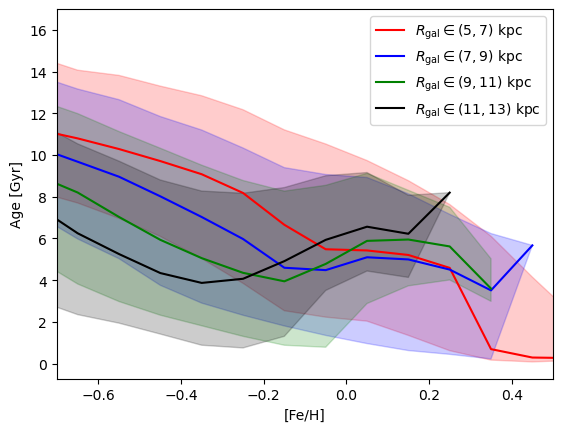

In [4]:
fig, ax = plt.subplots()
rgal_bins = [(5, 7), (7, 9), (9, 11), (11, 13)]
feh_bins = np.arange(-1.5, 0.7, 0.1)
colors = ['r', 'b', 'g', 'k']
for i, rgal_lim in enumerate(rgal_bins):
    vice_subset = mzs.region(rgal_lim, (0, 2))
    subset_stars = vice_subset.stars
    binned_feh = subset_stars.groupby(pd.cut(subset_stars['[fe/h]'], feh_bins), observed=False)
    age_medians = binned_feh['age'].median()
    ax.plot(get_bin_centers(feh_bins), age_medians, color=colors[i], label=r'$R_{\rm gal}\in (%s, %s)$ kpc' % rgal_lim)
    # 1-sigma region
    age_high = binned_feh['age'].quantile(0.84)
    age_low = binned_feh['age'].quantile(0.16)
    ax.fill_between(get_bin_centers(feh_bins), age_low, age_high, color=colors[i], alpha=0.2)
ax.legend()
ax.set_ylabel('Age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_xlim((-0.7, 0.5))
plt.show()